In [5]:
# pip install tensorflow
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [6]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [7]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


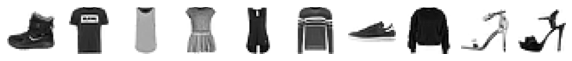

In [8]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [9]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [10]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


In [11]:
train_target.nbytes

60000

In [12]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [13]:
print(train_scaled.shape)

(60000, 784)


In [14]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8192833333333333


In [15]:
sc = SGDClassifier(loss='log', max_iter=20, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.84365


In [16]:
import tensorflow as tf

In [17]:
from tensorflow import keras

In [18]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [19]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [20]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [21]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784, ))

In [22]:
model = keras.Sequential(dense)

In [24]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [25]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [32]:
train_input[::,0].shape

(60000, 28)

In [33]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 1s 692us/step - loss: 0.6057 - accuracy: 0.7957
Epoch 2/5
1500/1500 [==============================] - 1s 694us/step - loss: 0.4781 - accuracy: 0.8394
Epoch 3/5
1500/1500 [==============================] - 1s 699us/step - loss: 0.4549 - accuracy: 0.8489
Epoch 4/5
1500/1500 [==============================] - 1s 698us/step - loss: 0.4438 - accuracy: 0.8528
Epoch 5/5
1500/1500 [==============================] - 1s 695us/step - loss: 0.4370 - accuracy: 0.8535


In [34]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 628us/step - loss: 0.4504 - accuracy: 0.8511


[0.4503627419471741, 0.8510833382606506]

In [41]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [42]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target =\
    train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [44]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784, ))
dense2 = keras.layers.Dense(10, activation='softmax')

In [45]:
model = keras.Sequential([dense1, dense2])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               78500     
                                                                 
 dense_10 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [47]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784, ), name='hidden'),
    keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [48]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [52]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784, )))
model.add(keras.layers.Dense(10, activation='softmax'))

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5647 - accuracy: 0.8070
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4069 - accuracy: 0.8552
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3726 - accuracy: 0.8646
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3493 - accuracy: 0.8735
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3321 - accuracy: 0.8788


In [55]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [56]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dense_16 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [57]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [58]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5331 - accuracy: 0.8119
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3926 - accuracy: 0.8602
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3531 - accuracy: 0.8735
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3362 - accuracy: 0.8807
Epoch 5/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3205 - accuracy: 0.8860


In [59]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 758us/step - loss: 0.3565 - accuracy: 0.8728


[0.3564627766609192, 0.8728333115577698]

In [61]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [62]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target ,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 2s 864us/step - loss: 0.5251 - accuracy: 0.8154
Epoch 2/5
1500/1500 [==============================] - 1s 875us/step - loss: 0.3947 - accuracy: 0.8597
Epoch 3/5
1500/1500 [==============================] - 1s 871us/step - loss: 0.3524 - accuracy: 0.8734
Epoch 4/5
1500/1500 [==============================] - 1s 866us/step - loss: 0.3309 - accuracy: 0.8791
Epoch 5/5
1500/1500 [==============================] - 1s 875us/step - loss: 0.3098 - accuracy: 0.8866


In [64]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 702us/step - loss: 0.3775 - accuracy: 0.8607


[0.3775181174278259, 0.8606666922569275]

In [65]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target =\
    train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [67]:
def model_fn(a_layer=None):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [69]:
model = model_fn()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [71]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


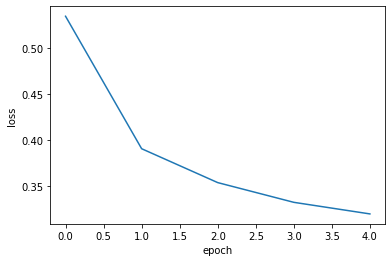

In [72]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

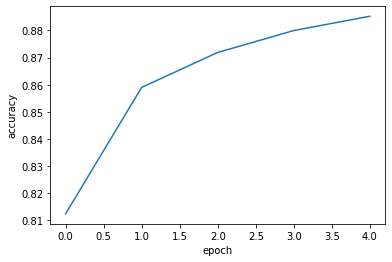

In [73]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

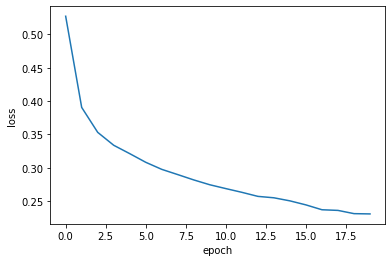

In [74]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [75]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [76]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


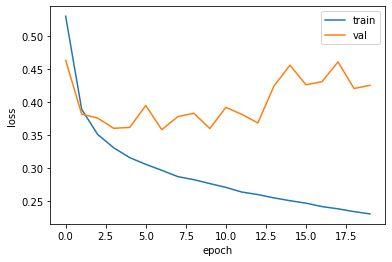

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

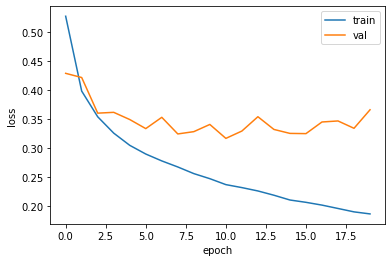

In [78]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [82]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_32 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


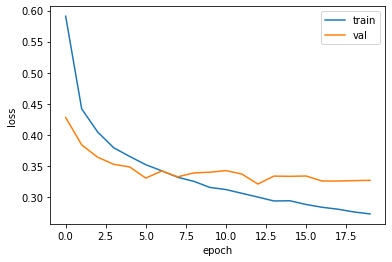

In [83]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()